# Program 2 (`1.daphne`)

In [54]:
from evaluator import evaluate, ast_helper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
i=1
fname='{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs/')
%cat programs/1.daphne


(defn until-success [p n]
   (if (sample (flip p))
     n
     (until-success p (+ n 1))))

(let [p 0.01]
  (until-success p 0))


In [85]:
evaluate(exp, do_log=False) # example return value

tensor(18)

In [45]:
import sys
sys.setrecursionlimit(1000000)

In [ ]:
n_samples=100000
samples = [evaluate(exp).item() for sample in range(n_samples)]
# 4.8s / 100 samples

In [84]:
# np.save('program2.npy',np.array(samples))

Text(0.5, 1.0, '2.daphne \n n_samples 100000')

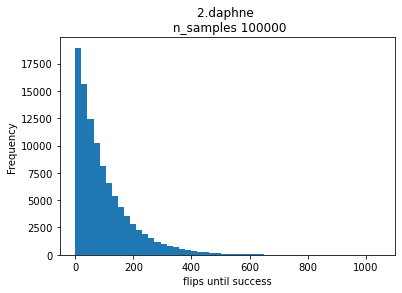

In [72]:
sr = pd.Series(samples)
sr.plot.hist(bins=50)
plt.xlabel('flips until success')
plt.title('{} \n n_samples {}'.format(fname,n_samples))

In [73]:
print('expectation w.r.t. the prior {:1.3f}'.format(sr.mean()))
print('std & var w.r.t. the prior {:1.3f} & {:1.1f}'.format(sr.std(),sr.var()))

expectation w.r.t. the prior 98.665
std & var w.r.t. the prior 99.041 & 9809.1


This is a standard textbook problem of a [Geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution) "The probability distribution of the number $Y = X − 1$ of failures before the first success, supported on the set ${\displaystyle \{0,1,2,\ldots \}}."$

The ground truth mean and var are thus $\frac{1-p}{p}$ and $\frac{1-p}{p^2}$, where $p=0.01$ in the homework problem, and we can analytically compare against our estimates.

In [83]:
p = 0.01
gt_mean = (1-p)/p
gt_std = np.sqrt(gt_mean/p)
gt_mean, gt_std
assert np.abs(gt_mean - sr.mean()) / gt_mean < 0.05
assert np.abs(gt_std - sr.std()) / gt_std < 0.05